In [ ]:
import numpy as np
import pandas as pd
import nltk
import re, random, os
import string, pprint
import matplotlib.pyplot as plt
import seaborn as sns

# spacy for basic preprocessing, optional, can use nltk as well (lemmatisation etc.)
import spacy

# gensim for LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
#from pyLDAvis import gensim_models as pg
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
df = pd.read_csv('amazon-final copy.csv')

<ipython-input-3-30628402fa42>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('amazon-final copy.csv')


In [ ]:
df['asins'].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [ ]:
print(df['asins'].value_counts()['B018Y229OU'])

10966


In [ ]:
df1 = df[df['asins']=='B018Y229OU']

In [ ]:
df1.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
3695,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,"Good basic tablet for checking email , web bro...",Good,NaN,NaN,Jacques
3696,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,I love this tablet. It was a great buy. I woul...,Great tablet!,NaN,NaN,resolution516
3697,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,"Brought my old tablet in to my local store, an...",Good tablet for a low price.,NaN,NaN,AvatarRei
3698,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,Good Inexpensive tablet for someone that does ...,Good tablet for a beginner,NaN,NaN,blondia
3699,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,I got this for my niece. I would say this prod...,Great for kids,NaN,NaN,EliteOne


In [ ]:
df1.isnull().sum()

id                          0
name                        0
asins                       0
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date                0
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     10966
reviews.doRecommend         0
reviews.id              10966
reviews.numHelpful          0
reviews.rating              0
reviews.sourceURLs          0
reviews.text                0
reviews.title               0
reviews.userCity        10966
reviews.userProvince    10966
reviews.username            1
dtype: int64

Here reviews.userCity and reviews.userprovince does not add any value to our analysis. Additionally reviews.didPurchase is not helpful in this context. Also the reviews.is same as id. Therefore there are no null values which need treatment for our analysis.

In [ ]:
df1['reviews'] = df1['reviews.text']+ df1['reviews.title']
df1 = df1.drop(['reviews.text','reviews.title'], axis=1)
df1.head()

<ipython-input-9-80c3232ba0af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviews'] = df1['reviews.text']+ df1['reviews.title']


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.userCity,reviews.userProvince,reviews.username,reviews
3695,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,Jacques,"Good basic tablet for checking email , web bro..."
3696,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,resolution516,I love this tablet. It was a great buy. I woul...
3697,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,AvatarRei,"Brought my old tablet in to my local store, an..."
3698,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,blondia,Good Inexpensive tablet for someone that does ...
3699,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,EliteOne,I got this for my niece. I would say this prod...


In [ ]:
df1['reviews.rating'].value_counts()

5.0    6495
4.0    3447
3.0     696
2.0     166
1.0     162
Name: reviews.rating, dtype: int64

In [ ]:
def f(row):

    '''This function returns sentiment value based on the overall ratings from the user'''

    if row['reviews.rating'] == 3.0:
        val = 'Neutral'
    elif row['reviews.rating'] == 1.0 or row['reviews.rating'] == 2.0:
        val = 'Negative'
    elif row['reviews.rating'] == 4.0 or row['reviews.rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [ ]:
df1['sentiment'] = df1.apply(f, axis=1)
df1.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.userCity,reviews.userProvince,reviews.username,reviews,sentiment
3695,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,Jacques,"Good basic tablet for checking email , web bro...",Positive
3696,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,resolution516,I love this tablet. It was a great buy. I woul...,Positive
3697,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,AvatarRei,"Brought my old tablet in to my local store, an...",Positive
3698,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,blondia,Good Inexpensive tablet for someone that does ...,Positive
3699,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,EliteOne,I got this for my niece. I would say this prod...,Positive


In [ ]:
df1['sentiment'].value_counts()

Positive    9942
Neutral      696
Negative     328
Name: sentiment, dtype: int64

In [ ]:
df1.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.userCity,reviews.userProvince,reviews.username,reviews,sentiment
3695,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,Jacques,"Good basic tablet for checking email , web bro...",Positive
3696,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,resolution516,I love this tablet. It was a great buy. I woul...,Positive
3697,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,AvatarRei,"Brought my old tablet in to my local store, an...",Positive
3698,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,blondia,Good Inexpensive tablet for someone that does ...,Positive
3699,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,EliteOne,I got this for my niece. I would say this prod...,Positive


In [ ]:
# Splitting the 'reviews.date' column on '-'
new = df1["reviews.date"].str.split("-", n=1, expand=True)

# Splitting the second part on 'T'
date_and_time = new[1].str.split("T", n=1, expand=True)

# Extracting the year from the first part
year = new[0]

# Extracting the date from the second part
date = date_and_time[0]

# Adding the year and date columns to the DataFrame
df1["year"] = year
df1["date"] = date



# Displaying the modified DataFrame
df1.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.userCity,reviews.userProvince,reviews.username,reviews,sentiment,year,date
3695,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,Jacques,"Good basic tablet for checking email , web bro...",Positive,2016,12-23
3696,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,resolution516,I love this tablet. It was a great buy. I woul...,Positive,2016,12-23
3697,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,AvatarRei,"Brought my old tablet in to my local store, an...",Positive,2016,12-23
3698,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,blondia,Good Inexpensive tablet for someone that does ...,Positive,2016,12-23
3699,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,EliteOne,I got this for my niece. I would say this prod...,Positive,2016,12-23


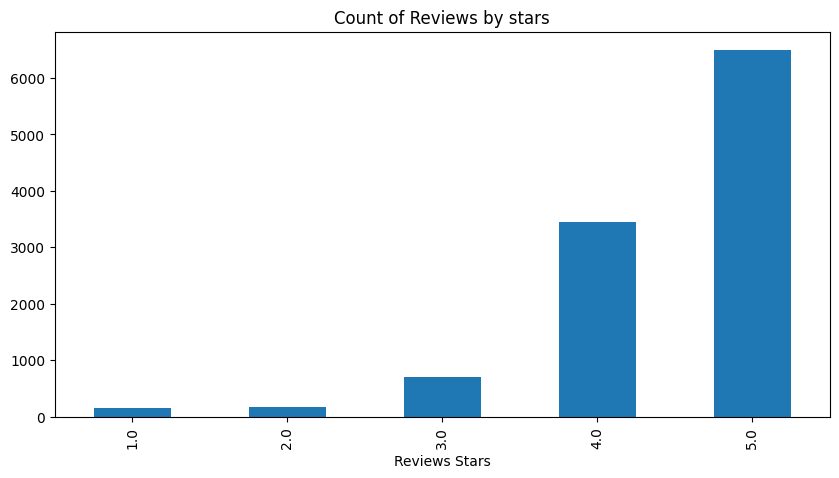

In [ ]:
dx = df1['reviews.rating'].value_counts().sort_index()\
     .plot(kind='bar',
           title = 'Count of Reviews by stars',
           figsize= (10, 5))
dx.set_xlabel('Reviews Stars')
plt.show()

In [ ]:
# Splitting the date
new1 = df1["date"].str.split("-", n = 1, expand = True)

# adding month to the main dataset
df1["month"]= new1[0]

# adding day to the main dataset
df1["day"]= new1[1]

df1=df1.drop(['date'], axis=1)
df1.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.rating,reviews.sourceURLs,reviews.userCity,reviews.userProvince,reviews.username,reviews,sentiment,year,month,day
3695,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,Jacques,"Good basic tablet for checking email , web bro...",Positive,2016,12,23
3696,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,5.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,resolution516,I love this tablet. It was a great buy. I woul...,Positive,2016,12,23
3697,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,5.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,AvatarRei,"Brought my old tablet in to my local store, an...",Positive,2016,12,23
3698,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,blondia,Good Inexpensive tablet for someone that does ...,Positive,2016,12,23
3699,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,4.0,http://reviews.bestbuy.com/3545/5025800/review...,NaN,NaN,EliteOne,I got this for my niece. I would say this prod...,Positive,2016,12,23


In [ ]:
df1['reviews.numHelpful'].value_counts()

0.0      9193
1.0      1170
2.0       299
3.0        99
4.0        67
5.0        51
8.0        16
7.0        14
6.0        10
9.0         9
12.0        4
21.0        3
16.0        3
10.0        3
13.0        3
14.0        3
36.0        2
18.0        1
57.0        1
39.0        1
27.0        1
19.0        1
24.0        1
109.0       1
34.0        1
73.0        1
17.0        1
11.0        1
102.0       1
96.0        1
25.0        1
22.0        1
20.0        1
40.0        1
Name: reviews.numHelpful, dtype: int64

#Removing unnecessary columns

In [ ]:
df2 = df1.drop(['reviews.userCity','reviews.userProvince', 'reviews.didPurchase', 'reviews.id'], axis=1)

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df2['reviews']=df2['reviews'].apply(lambda x:review_cleaning(x))
df2.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.username,reviews,sentiment,year,month,day
3695,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,Jacques,good basic tablet for checking email web brow...,Positive,2016,12,23
3696,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,resolution516,i love this tablet it was a great buy i would ...,Positive,2016,12,23
3697,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,AvatarRei,brought my old tablet in to my local store and...,Positive,2016,12,23
3698,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,blondia,good inexpensive tablet for someone that does ...,Positive,2016,12,23
3699,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,EliteOne,i got this for my niece i would say this produ...,Positive,2016,12,23


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 45.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
import pyLDAvis
import pyLDAvis.gensim
from pyLDAvis import gensim_models as pg

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the basic English stopwords
basic_stopwords = set(stopwords.words('english'))

# Print the basic stopwords
print(basic_stopwords)


{'why', 'me', 'they', 'through', 'mightn', 'he', 'under', 'her', 'where', 's', 'with', "you'll", 'his', 'above', 'while', 'she', 'be', 'so', 'it', 'between', 'off', 'very', "won't", 'their', 'doesn', 'below', 'during', 'will', 'how', 'not', "that'll", 'our', 'too', 'does', 'what', 'has', 'its', 'were', 'needn', 'down', "she's", 'myself', 'who', "hadn't", "shouldn't", 'i', 'if', 'wasn', "mightn't", "didn't", 'wouldn', 'but', 'ourselves', 'had', 'only', 'been', 'other', 'than', "don't", 'haven', "weren't", 'after', 'whom', 'now', 'aren', 'until', 'weren', 'your', 'and', 'was', 'do', "wouldn't", 'those', "doesn't", 'because', 'did', 'as', 'most', 'hadn', 'shan', 'same', 'mustn', "you'd", 'once', 'themselves', 'in', 'further', 'hasn', 'to', 'can', 'isn', 'when', 't', 'these', 'o', 'out', 'then', 'into', 'll', 'couldn', "isn't", 'didn', 'more', 'we', "hasn't", 'd', 'on', 'yourself', 'about', 'of', 're', 'which', "you're", "should've", "aren't", 'are', 'each', 'again', "it's", 'this', 'ain',

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df2['reviews'] = df2['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (basic_stopwords)]))
df2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.username,reviews,sentiment,year,month,day
3695,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,Jacques,good basic tablet checking email web browsing ...,Positive,2016,12,23
3696,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,resolution516,love tablet great buy would strongly recommend...,Positive,2016,12,23
3697,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,AvatarRei,brought old tablet local store said would need...,Positive,2016,12,23
3698,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,blondia,good inexpensive tablet someone use oftengood ...,Positive,2016,12,23
3699,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,EliteOne,got niece would say product sturdy enough kids...,Positive,2016,12,23


In [ ]:
pd.DataFrame(df2.groupby('sentiment')['reviews.numHelpful'].mean())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews.numHelpful
sentiment,
Negative,1.539634
Neutral,0.471264
Positive,0.321565


The data table indicates that the average helpful rate is higher for negative reviews compared to neutral and positive ones. This difference in mean values could be attributed to the presence of numerous zero values in the helpful rates. To gain further insights, let's visualize the distribution of these values using a violin plot.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  # Albeit hashmap has O(1) look-up (vs. O(logn) in sorted array),
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated Nu

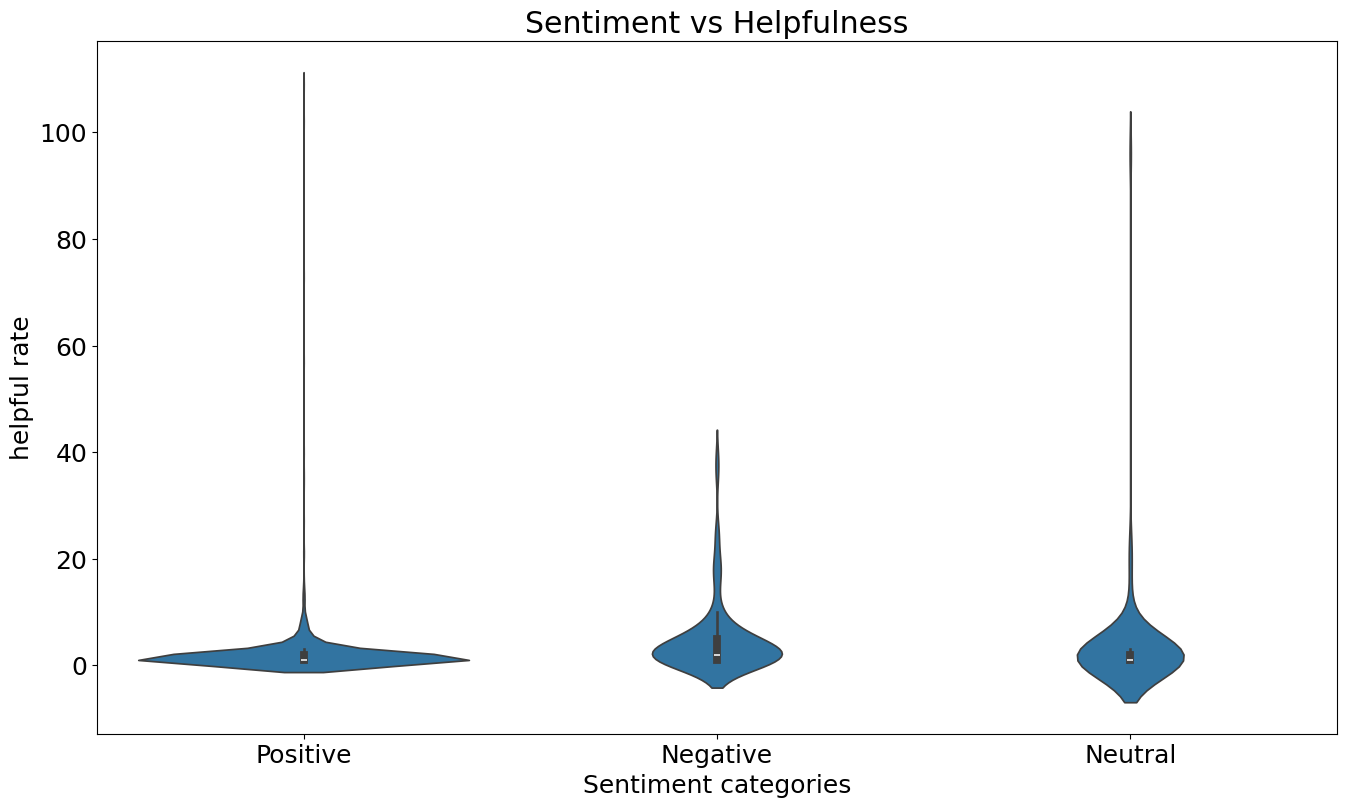

In [ ]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
senti_help= pd.DataFrame(df2, columns = ['sentiment', 'reviews.numHelpful'])
senti_help = senti_help[senti_help['reviews.numHelpful'] != 0.00]

# Check if there are any records left after filtering
if senti_help.empty:
    print("No data after filtering. Plot cannot be generated.")
else:
    # Define a custom color palette for each sentiment category
    custom_palette = {"negative": "red", "neutral": "blue", "positive": "green"}
#Plotting phase
sns.violinplot( x=senti_help["sentiment"], y=senti_help["reviews.numHelpful"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('helpful rate')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


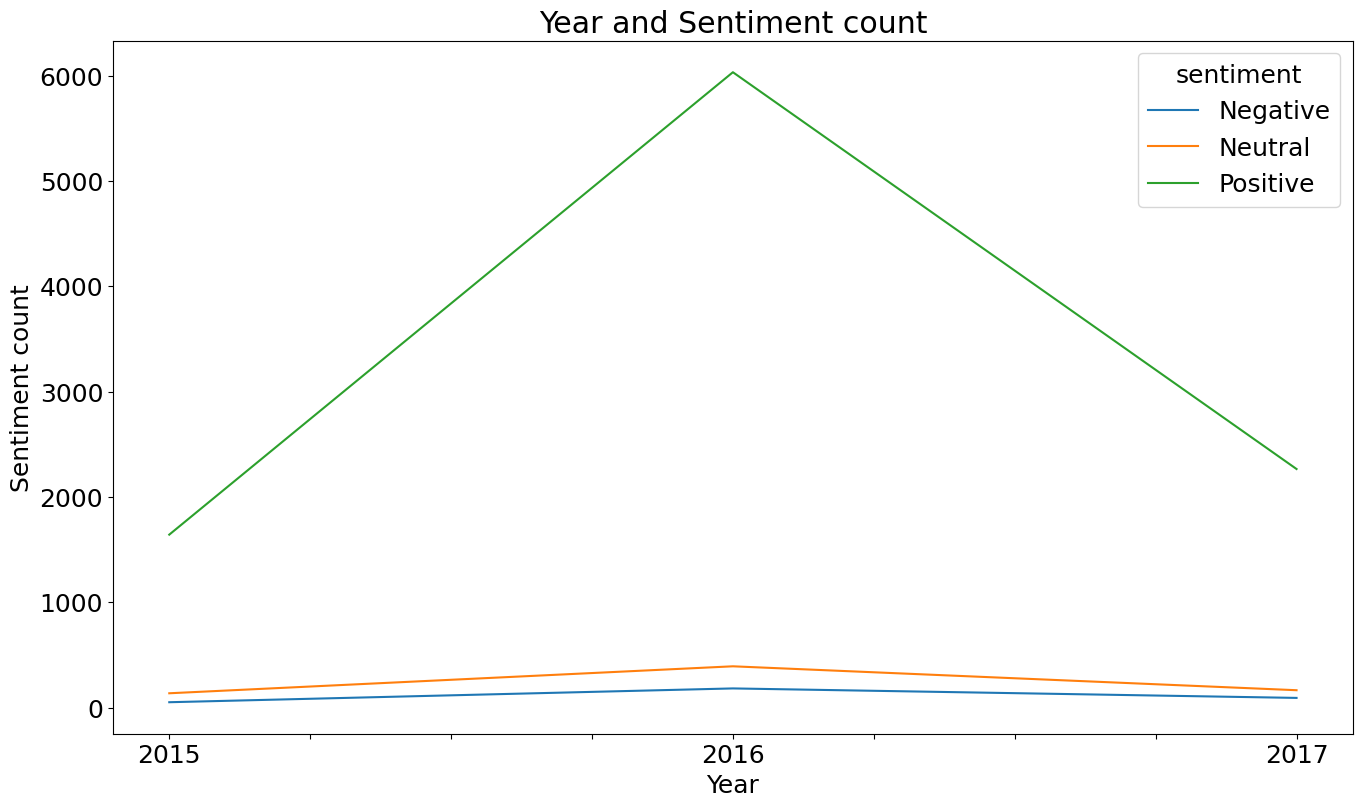

In [ ]:
df2.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

The visualization illustrates a noticeable increase in positive reviews starting from 2015, peaking around 2016, followed by a decline in 2016, coinciding with a decrease in overall review rates. Negative and neutral reviews remain notably lower in comparison to positive reviews. This observation contradicts our second assumption.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  # Albeit hashmap has O(1) look-up (vs. O(logn) in sorted array),
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated Nu

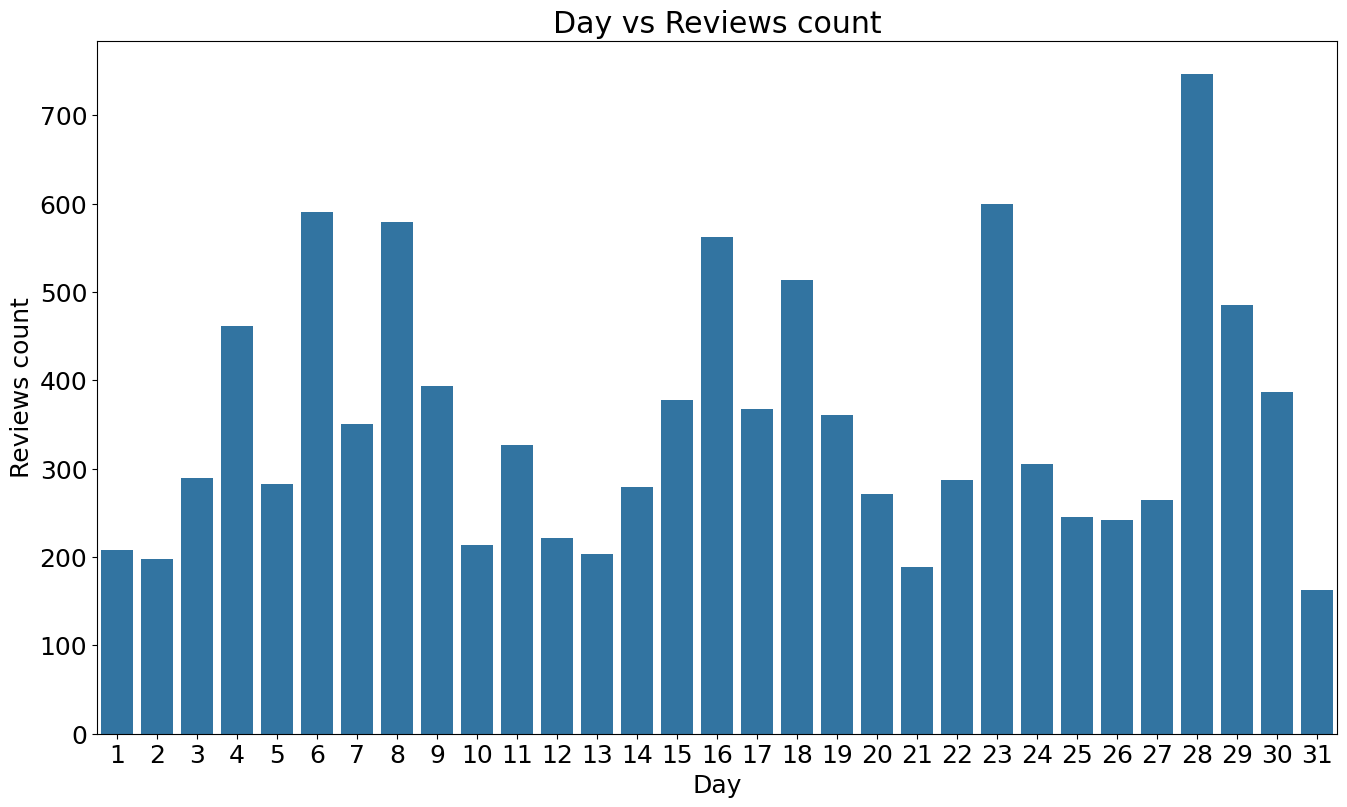

In [ ]:
#Creating a dataframe
day=pd.DataFrame(df2.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

In [ ]:
from textblob import TextBlob


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2['polarity'] = df2['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
df2['review_len'] = df2['reviews'].astype(str).apply(len)
df2['word_count'] = df2['reviews'].apply(lambda x: len(str(x).split()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.sourceURLs,reviews.username,reviews,sentiment,year,month,day,polarity,review_len,word_count
3695,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,http://reviews.bestbuy.com/3545/5025800/review...,Jacques,good basic tablet checking email web browsing ...,Positive,2016,12,23,0.350000,64,9
3696,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,http://reviews.bestbuy.com/3545/5025800/review...,resolution516,love tablet great buy would strongly recommend...,Positive,2016,12,23,0.646667,100,15
3697,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,http://reviews.bestbuy.com/3545/5025800/review...,AvatarRei,brought old tablet local store said would need...,Positive,2016,12,23,0.266667,160,27
3698,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,http://reviews.bestbuy.com/3545/5025800/review...,blondia,good inexpensive tablet someone use oftengood ...,Positive,2016,12,23,0.700000,61,8
3699,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-23T00:00:00.000Z,2017-07-02T18:59:13Z,"2017-06-07T08:20:00.000Z,2017-04-30T00:09:00.000Z",...,http://reviews.bestbuy.com/3545/5025800/review...,EliteOne,got niece would say product sturdy enough kids...,Positive,2016,12,23,0.244444,147,23


In [ ]:
from plotly.offline import iplot


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

# Assuming df2 is your DataFrame containing the 'polarity' Series

# Create a histogram trace
trace = go.Histogram(x=df2['polarity'], nbinsx=30)

# Create a figure and add the histogram trace
fig = go.Figure(data=[trace])

# Update layout
fig.update_layout(
    title='Sentiment Polarity Distribution',
    xaxis_title='polarity',
    yaxis_title='count',
)

# Plot the figure
iplot(fig)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Insights:

There's a notable abundance of positive polarities in contrast to the negative ones.
This distribution of polarities confirms the abundance of positive reviews we've received.
This polarity distribution appears to follow a normal distribution pattern, albeit not a standard normal one.

In [ ]:
from collections import defaultdict

# Now you can use defaultdict in your code


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from nltk.corpus import stopwords

# Now you can use STOPWORDS
stop_words = set(stopwords.words('english'))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Review Text Length

In [ ]:
#Filtering data
review_pos = df2[df2["sentiment"]=='Positive'].dropna()
review_neu = df2[df2["sentiment"]=='Neutral'].dropna()
review_neg = df2[df2["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in stop_words]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(35), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(35), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(35), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py:2316: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py:2316: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.1

In [ ]:
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews",
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py:2316: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py:2316: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.1

In [ ]:
## Get the bar chart from positive reviews ##
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews",
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py:2316: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py:2316: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



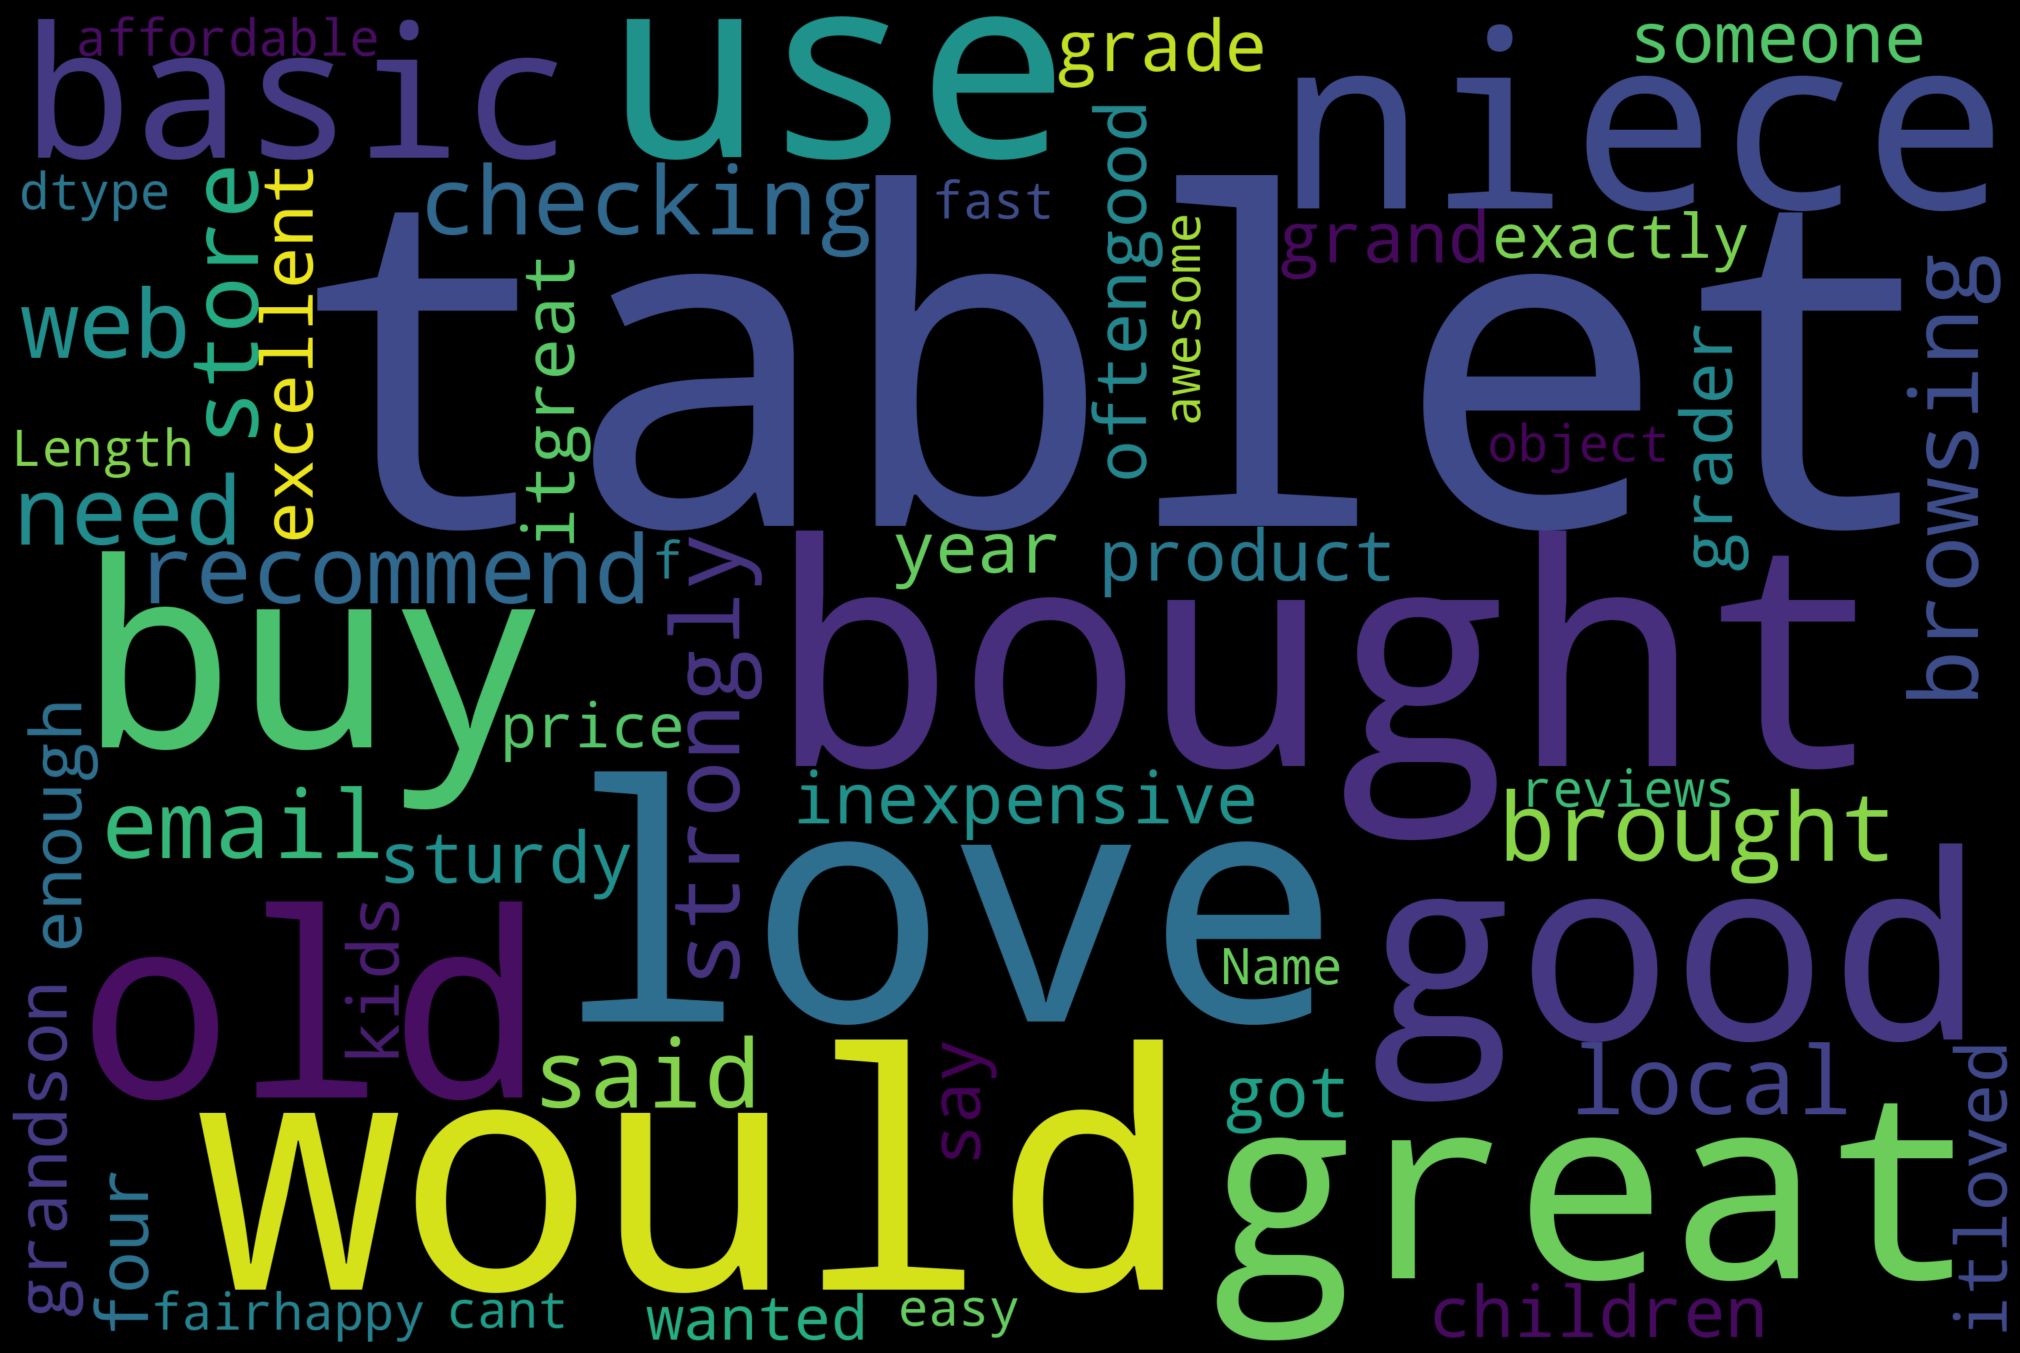

In [ ]:
text = review_pos["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



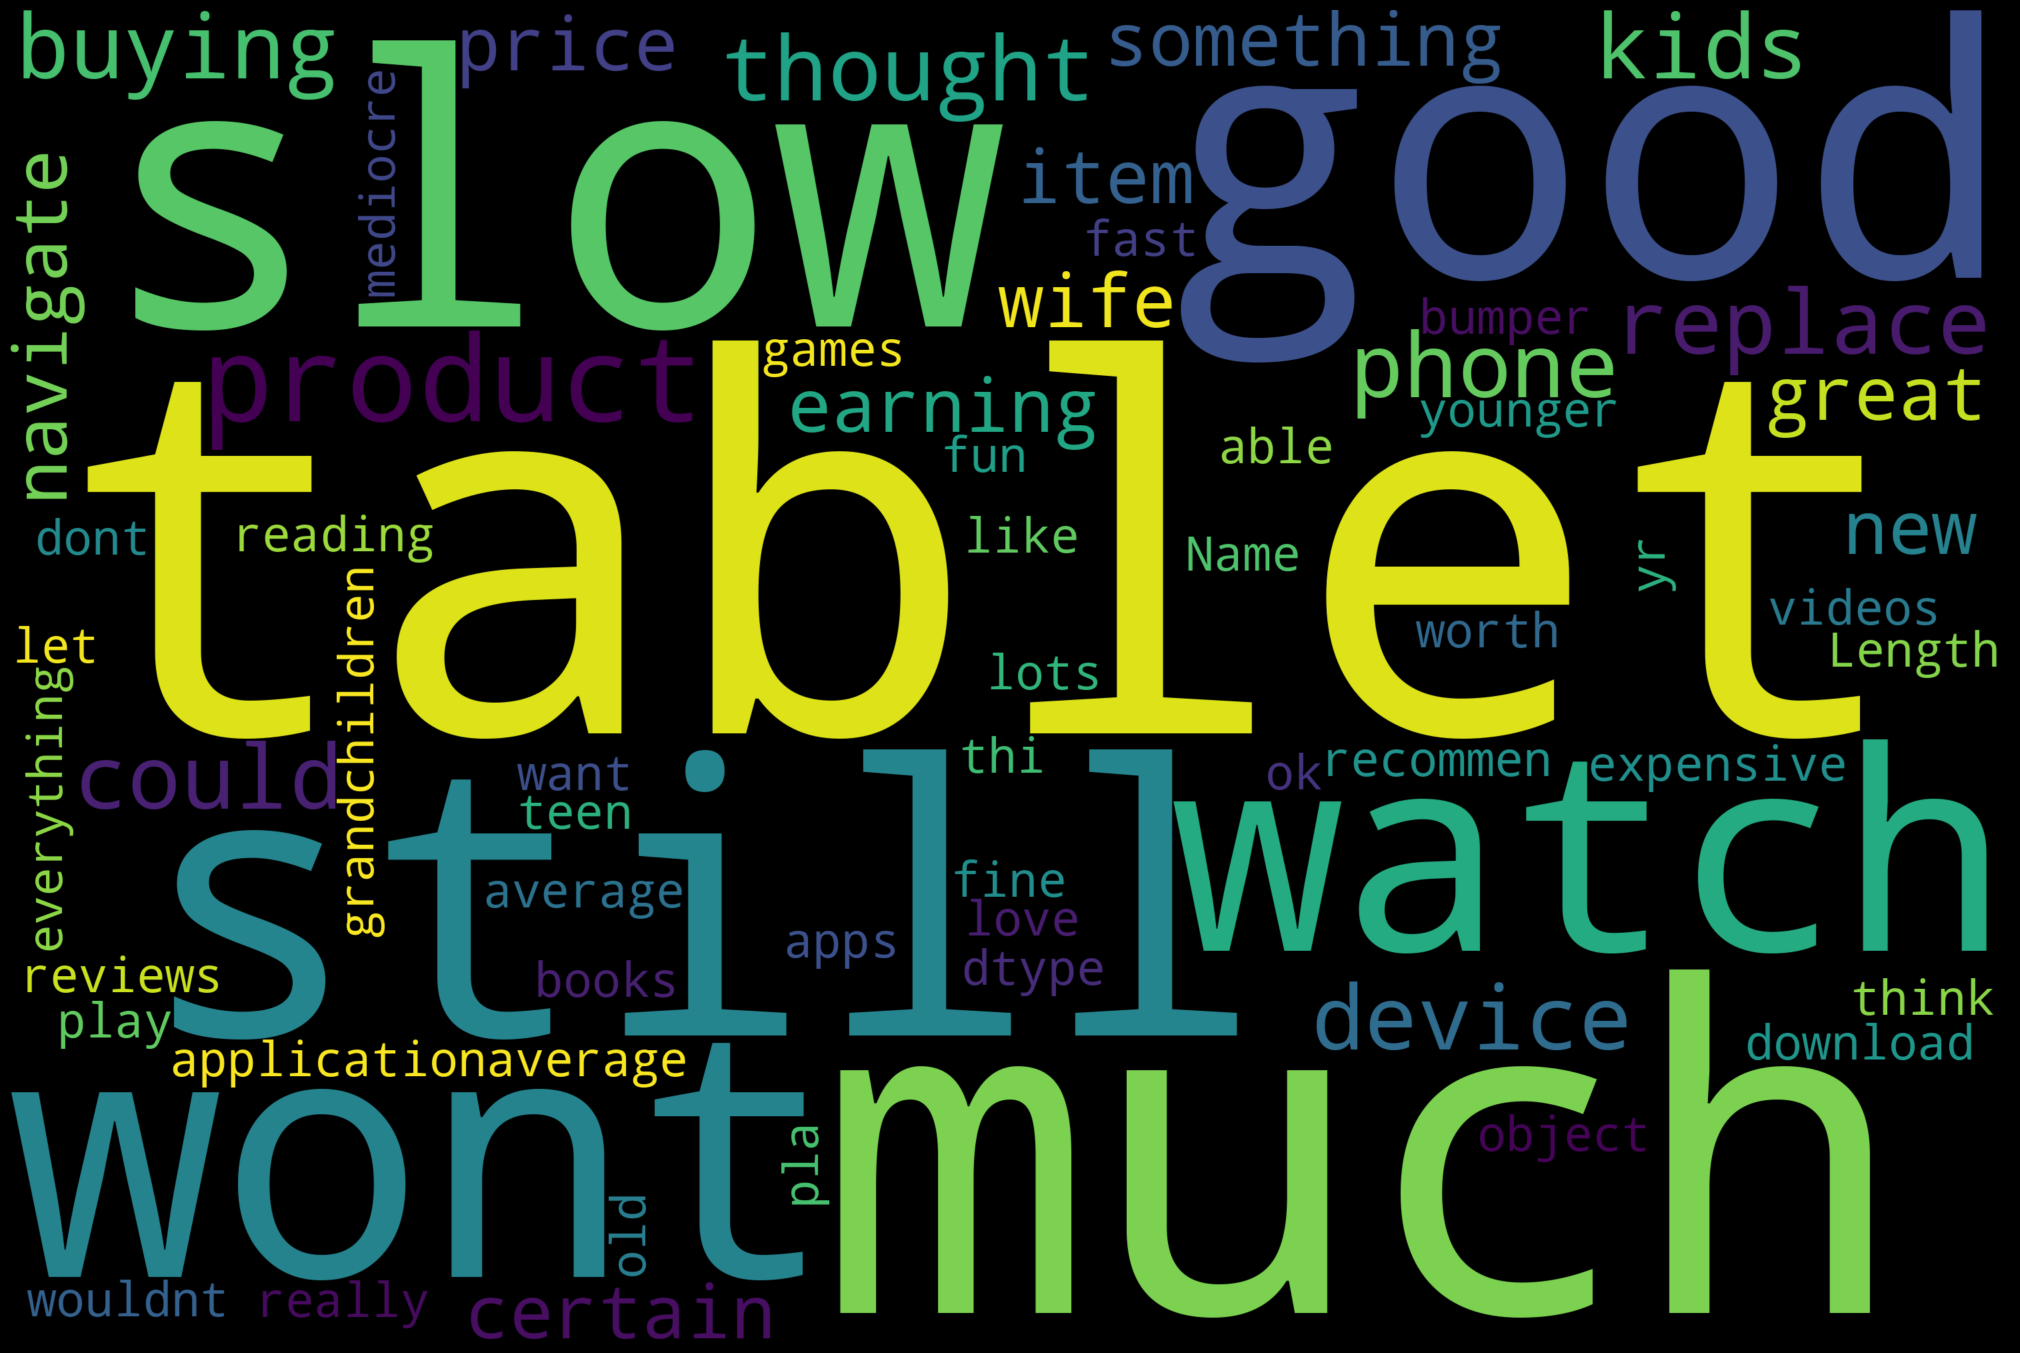

In [ ]:
text = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



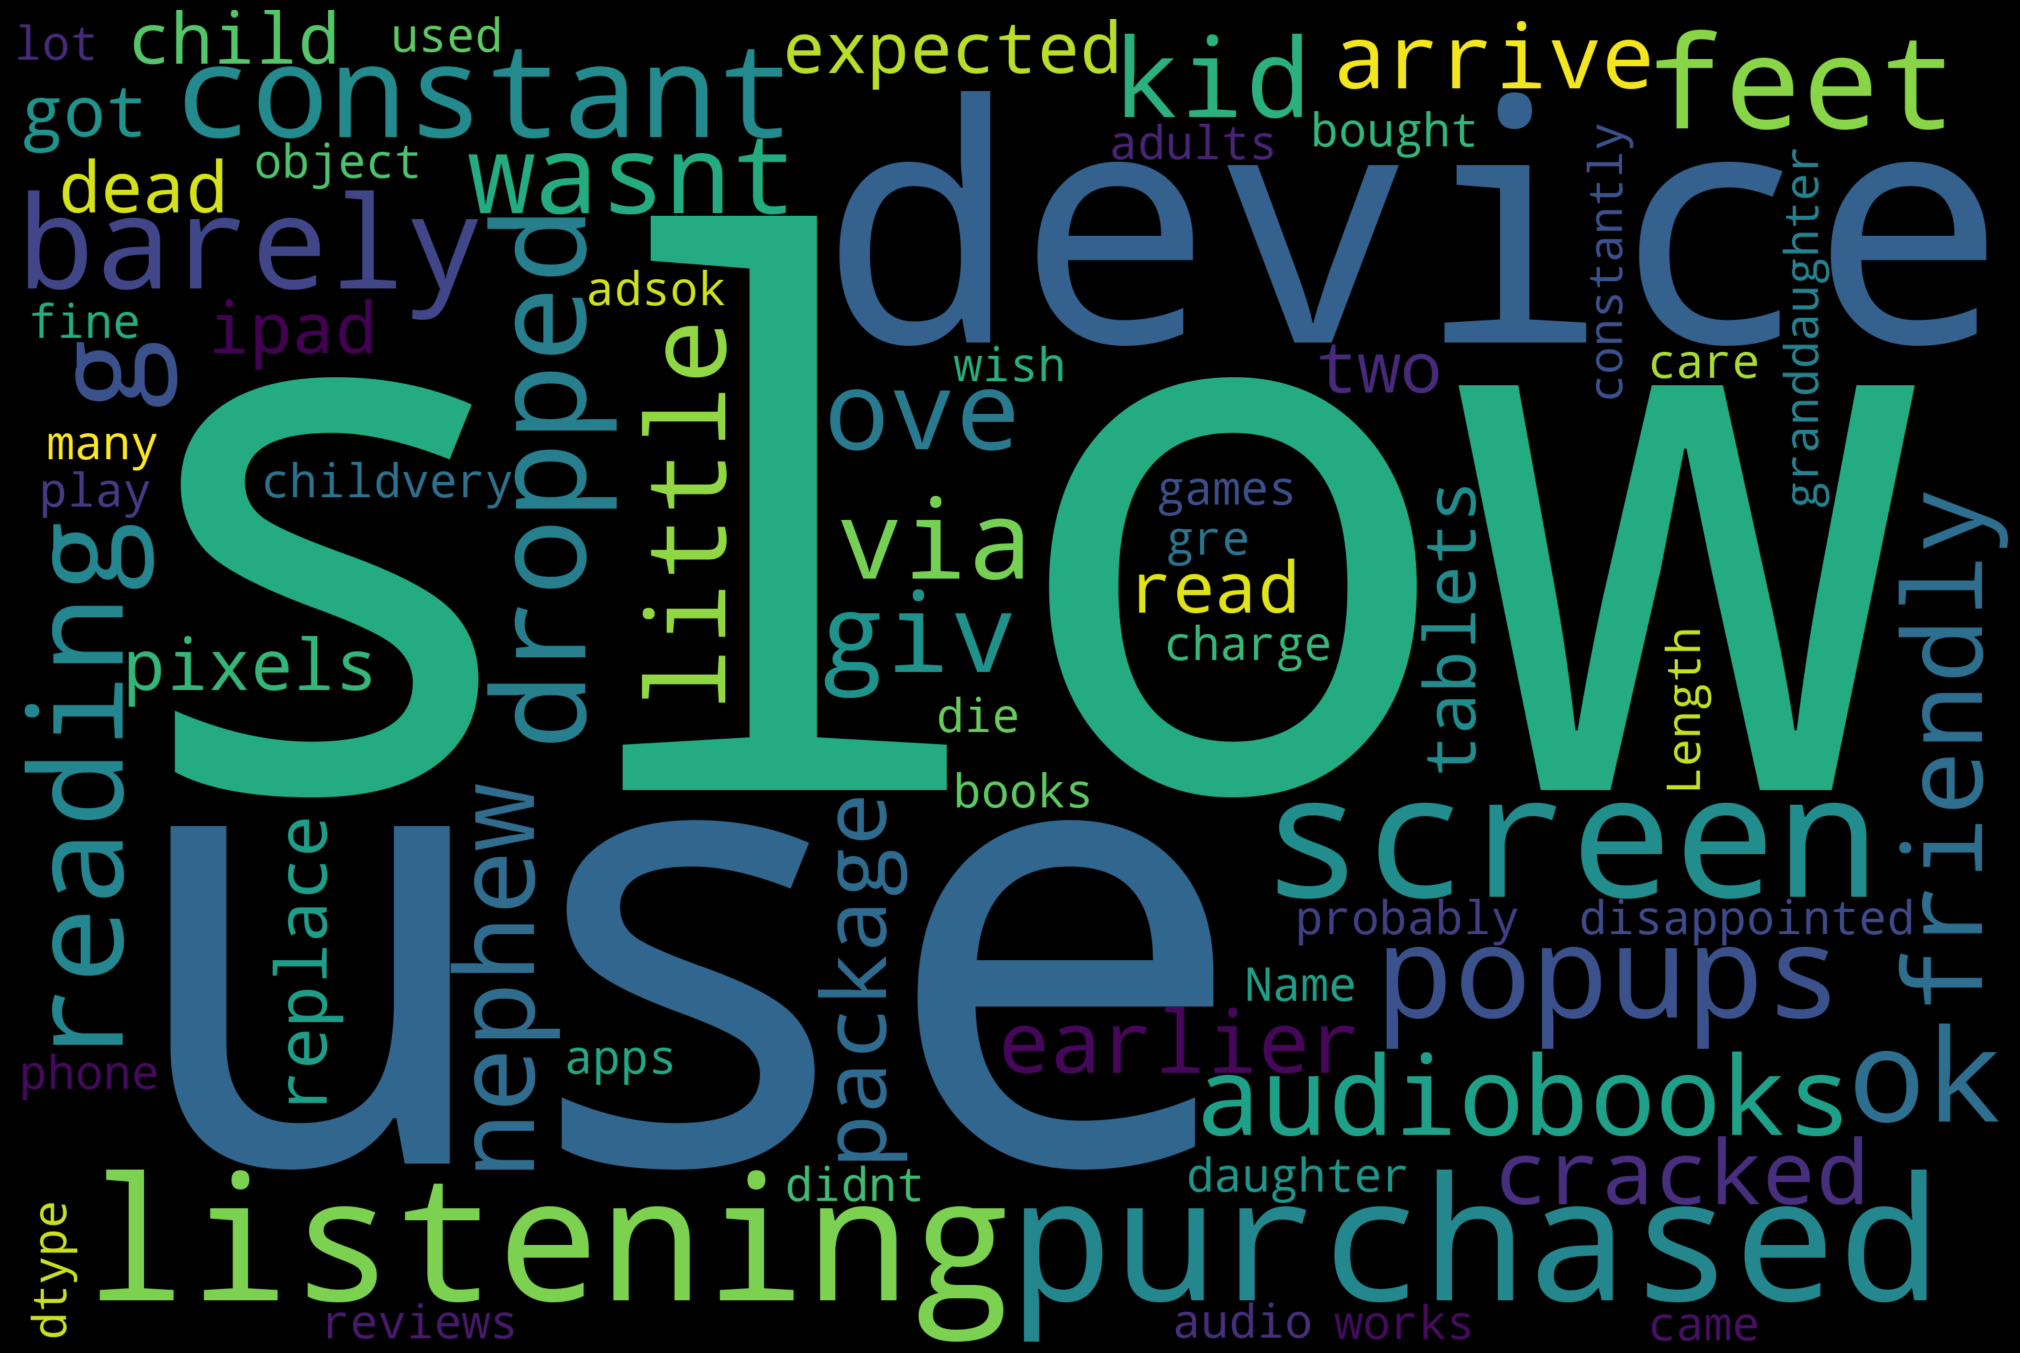

In [ ]:
text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from sklearn import preprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'sentiment'.
df2['sentiment']= label_encoder.fit_transform(df2['sentiment'])

df2['sentiment'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([2, 1, 0])

In [ ]:
df2['sentiment'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



2    9942
1     696
0     328
Name: sentiment, dtype: int64

In [ ]:
#Extracting 'reviews' for processing
review_features=df2.copy()
review_features=review_features[['reviews']].reset_index(drop=True)
review_features.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,reviews
0,good basic tablet checking email web browsing ...
1,love tablet great buy would strongly recommend...
2,brought old tablet local store said would need...
3,good inexpensive tablet someone use oftengood ...
4,got niece would say product sturdy enough kids...


In [ ]:
from nltk.stem import PorterStemmer




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
corpus[3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'good inexpens tablet someon use oftengood tablet beginn'

In [ ]:
#Basic libraries
import pandas as pd
import numpy as np


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews'])

In [ ]:
X.shape

(10966, 5000)

In [ ]:
#Getting the target variable(encoded)
y=df2['sentiment']

In [ ]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 9942, 1: 696, 0: 328})
Resampled dataset shape Counter({2: 9942, 1: 9942, 0: 9942})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9067114026974696
Decision Tree Test Accuracy: 0.8601125997245307
KNN Test Accuracy: 0.36850717617390494
SVC Test Accuracy: 0.9071676070770316
Naive Bayes Test Accuracy: 0.8745219210986832


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your data split for training and testing
# Assuming X_train and X_test are numpy arrays

# Define the parameter grid
param_grid = {'C': np.logspace(-4, 4, 50),
              'penalty': ['l1', 'l2']}

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the GridSearchCV object
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid, cv=5, verbose=0, n_jobs=1)
best_model = clf.fit(X_train, y_train)

# Print the best estimator and mean accuracy
print("Best estimator:", best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X_test, y_test))


Best estimator: LogisticRegression(C=10000.0, random_state=0)
The mean accuracy of the model is: 0.931205578650932


In [ ]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


Confusion matrix, without normalization


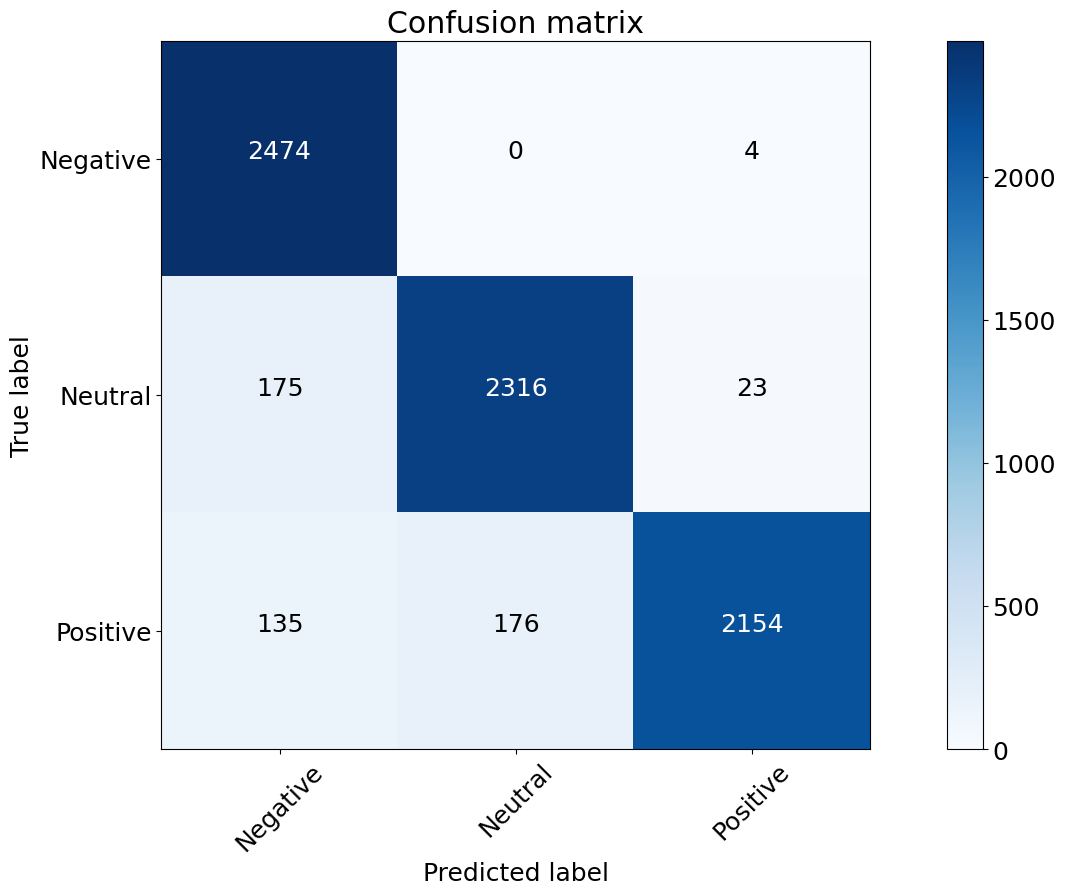

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])


In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      2478
           1       0.93      0.92      0.93      2514
           2       0.99      0.87      0.93      2465

    accuracy                           0.93      7457
   macro avg       0.94      0.93      0.93      7457
weighted avg       0.94      0.93      0.93      7457



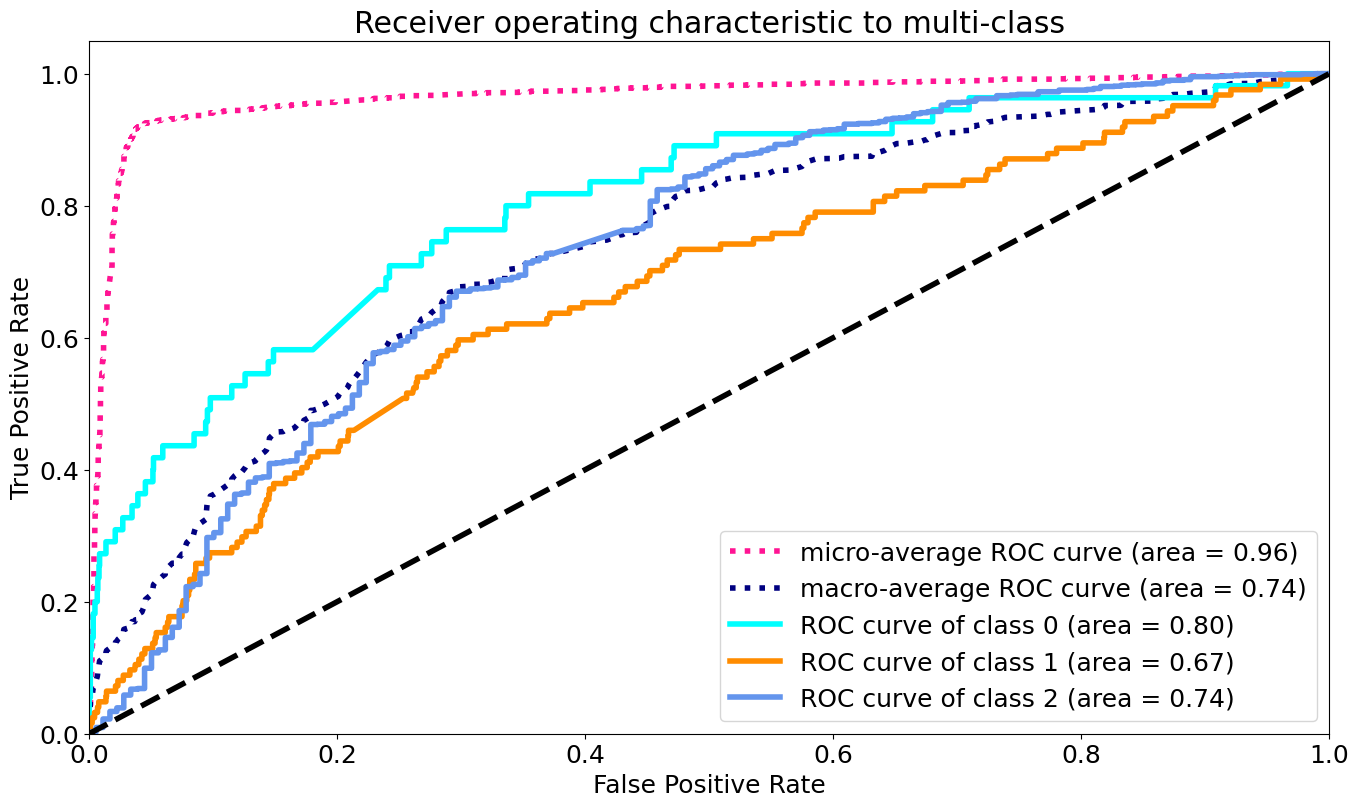

In [ ]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()